In [4]:
import cv2
import os
import pathlib
def extractt(video, subdire):
  
  vid = cv2.VideoCapture(video)
  success,image = vid.read()
  count = 0
  
  while success:
    cv2.imwrite(os.path.join(subdire, "%d.jpg" % count), image)
    success,image = vid.read()
    # print('Read a new frame: ', success)
    count += 1

# extractt('/content/drive/MyDrive/riset/wlasl/data/pervideo/a/01610.mp4') 

import os
rootdir = 'D:\disertasi\dataset\wlasl\pervideo'
dirb = 'extractFrame'
os.makedirs(dirb)
cnt = 0

for subdir, dirs, files in os.walk(rootdir):
    path = pathlib.PurePath(subdir)
    dirr = os.path.join(dirb, path.name)
    print(dirr)
    isExist = os.path.exists(dirr)
    if not isExist:
      os.mkdir(dirr)
    else:
      continue

    for file in files:
        filename = os.path.basename(file)
        flnm = os.path.splitext(filename)
        dir2 = os.path.join(dirr, flnm[0])
        isEx = os.path.exists(dir2)
        if not isEx:
          os.makedirs(dir2)
        else: 
          continue

        print(dir2)
        video = os.path.join(subdir,file)
        # print(path.name)
        extractt(video, dir2)
    cnt += 1
    # if(cnt == 2):
    #   break

extractFrame\pervideo
extractFrame\a lot
extractFrame\a lot\02124
extractFrame\a lot\02125
extractFrame\a lot\02126
extractFrame\a lot\02128
extractFrame\a lot\02129
extractFrame\a lot\02130
extractFrame\a lot\02131
extractFrame\abdomen
extractFrame\abdomen\00335
extractFrame\abdomen\00336
extractFrame\abdomen\00338
extractFrame\abdomen\00339
extractFrame\abdomen\00341
extractFrame\accent
extractFrame\accent\00583
extractFrame\accent\00584
extractFrame\accent\00585
extractFrame\accent\00586
extractFrame\accent\65006
extractFrame\accomplish
extractFrame\accomplish\00663
extractFrame\accomplish\00664
extractFrame\accomplish\00666
extractFrame\accomplish\00668
extractFrame\accomplish\65010
extractFrame\accountant
extractFrame\accountant\00689
extractFrame\accountant\00690
extractFrame\accountant\00692
extractFrame\accountant\00694
extractFrame\accountant\65011
extractFrame\across
extractFrame\across\00832
extractFrame\across\00834
extractFrame\across\00835
extractFrame\across\00836
extrac

KeyboardInterrupt: 

Ekstraksi Fitur Video

In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

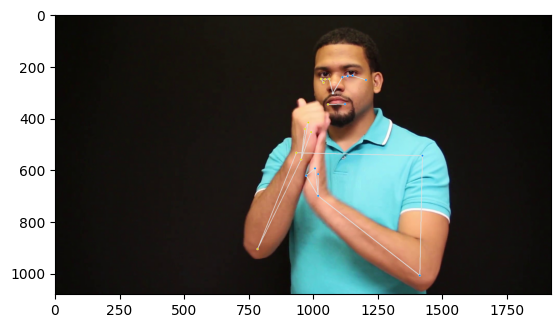

In [19]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
from IPython.display import display

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='D:\disertasi\code\pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
gambar = "D:\disertasi\code\extractFrame\a/ lot\02124\12.jpg"
image = mp.Image.create_from_file("extractFrame/agenda/01506/12.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.imshow(annotated_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


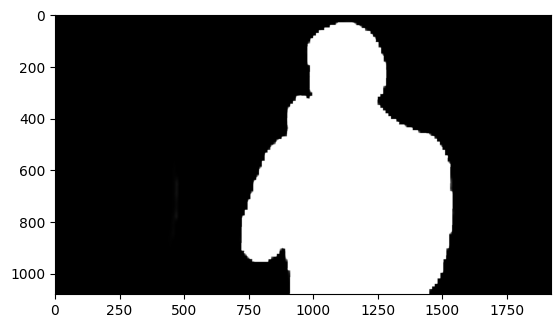

In [20]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(visualized_mask)